The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


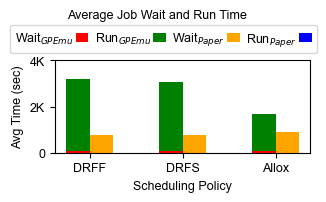

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fontsize=9
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = fontsize

fig = plt.gcf()
fig.set_size_inches(3.3, 1.2)

columns = ['policy', 'wait-gpemu', 'run-gpemu', 'wait-paper', 'run-paper']

df = pd.read_csv('jct.csv', sep='\t', names=columns)

wait_gpemu_values = df['wait-gpemu'].tolist()
run_gpemu_values = df['run-gpemu'].tolist()
wait_paper_values = df['wait-paper'].tolist()
run_paper_values = df['run-paper'].tolist()


categories = df['policy'].tolist()

num_subcategories = 2
bar_width = 0.25
index = np.arange(len(categories))

# Plotting the bar chart
plt.bar(index, wait_gpemu_values, bar_width, label='Wait$_{GPEmu}$', color='red')
plt.bar(index + 0 * bar_width, run_gpemu_values, bar_width, bottom=wait_gpemu_values, label='Run$_{GPEmu}$', color='green')
plt.bar(index + 1 * bar_width, wait_paper_values, bar_width, label='Wait$_{Paper}$', color='orange')
plt.bar(index + 1 * bar_width, run_paper_values, bar_width, bottom=wait_paper_values, label='Run$_{Paper}$', color='blue')


plt.ylim(0,4000)
# Adding labels and title
plt.xticks(index + (bar_width * 1) / 2, categories, fontsize=fontsize)
plt.yticks(ticks=[0, 2000, 4000], fontsize=fontsize, labels=["0", "2K", "4K"])
plt.ylabel('Avg Time (sec)', fontsize=fontsize)
plt.xlabel('Scheduling Policy', fontsize=fontsize)
title = plt.title('Average Job Wait and Run Time',fontsize=fontsize, pad=30)
title.set_position((0.4, 0))

fig.set_dpi(100)
plt.legend(loc="upper center", bbox_to_anchor=(0.425, 1.45), ncol=4, markerfirst=False, columnspacing=0.5, frameon=True, handletextpad=0.2, handlelength=1)

plt.savefig('allox.eps',  bbox_inches='tight')
# Displaying the chart
plt.show()

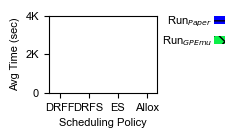

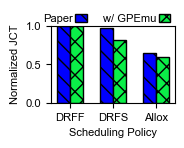

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

fontsize=8
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = fontsize

fig = plt.gcf()
fig.set_size_inches(1.6, 1.0)

columns = ['policy', 'jct-gpemu', 'wait-paper', 'run-paper']

df = pd.read_csv('jct.csv', sep='\t', names=columns)

gpemu_values = df['jct-gpemu']
paper_values = df["wait-paper"] + df["run-paper"]
gpemu_values /= gpemu_values[0]
paper_values /= paper_values[0]


categories = df['policy'].tolist()

num_subcategories = 2
bar_width = 0.3
index = np.arange(len(categories))

# Plotting the bar chart
plt.bar(index, paper_values.tolist(), bar_width, label='Paper', color='blue', hatch='\\\\', edgecolor="black")
plt.bar(index + 1 * bar_width, gpemu_values.tolist(), bar_width, label='w/ GPEmu', color='#0BEF48', hatch='xx', edgecolor="black")

plt.ylim(0,1)
# Adding labels and title
plt.xticks(index + (bar_width * 1) / 2, categories, fontsize=fontsize)
plt.yticks(ticks=[0, 0.5, 1], fontsize=fontsize)
plt.ylabel('Normalized JCT', fontsize=fontsize)
plt.xlabel('Scheduling Policy', fontsize=fontsize)

fig.set_dpi(100)
plt.legend(loc="upper center", bbox_to_anchor=(.45, 1.28), ncol=2, markerfirst=False, columnspacing=1.5, frameon=False, handletextpad=0.2, handlelength=1)

plt.savefig('allox.eps',  bbox_inches='tight')
# Displaying the chart
plt.show()